# README

The dataset balancer take a pickle dataset as input and perform the following steps:

- consider for each subject only the bigger slice
- move from subjects domain to integer domain the subject list
- 

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def fill_with_random_images(X_new, y_new, y, target_slices, slice_dataset):
    
    # Construct image generator
    aug = ImageDataGenerator(
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True
        # zoom_range=0.15,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # shear_range=0.15,
        # fill_mode="nearest"
    )

    # First free subject id 
    subject_id = len(list(y_new.keys()))

    imageGenerator = aug.flow(slice_dataset, batch_size=1)

    index = 0

    for img in imageGenerator:

        X_new[str(subject_id)] = np.array([img[0]])
        y_new[str(subject_id)] = y

        index = index + 1
        subject_id = subject_id + 1

        if index == target_slices:
            break

In [31]:
def fill_with_data_from_dict(X_new, y_new, X, y, subjects_to_copy):

    subject_id = len(list(y_new.keys()))

    for subject in subjects_to_copy:
        
        X_new[str(subject_id)] = np.array([X[subject][0,:,:,:]])
        y_new[str(subject_id)] = y[subject]

        subject_id = subject_id + 1

In [32]:
import os

def add_file_prefix(file_path, prefix):
    return f"{os.path.dirname(file_path)}/{prefix}-{os.path.basename(file_path)}"

In [24]:
import pickle
import numpy as np
from collections import Counter

def balance_dataset(dataset_path, prefix, class_size=None):
    
    with open(dataset_path, "rb") as file:
        # X is a dict: subject -> slices
        # y is a dict: subject -> label
        X, y = pickle.load(file)
        
    subjects = np.array(list(X.keys()))

    slices = np.concatenate([[X[subject][0,:,:,:]] for subject in subjects])
    labels = np.concatenate([np.repeat((y)[subject], 1) for subject in subjects])
    subjects = np.concatenate([np.repeat(subject, 1) for subject in subjects])

    # Count occurrences of label 0.0 and 1.0
    count = Counter(labels)

    X_new = {}
    y_new = {}

    # Bring the smaller class to the number of elements of bigger class
    if class_size is None:

        if count[0.0] < count[1.0]:
            fill_with_random_images(X_new, y_new, 0.0, count[1.0], slices[labels == 0.0])
            fill_with_data_from_dict(X_new, y_new, X, y, subjects[labels == 1.0])
        else:
            fill_with_random_images(X_new, y_new, 1.0, count[0.0], slices[labels == 1.0])
            fill_with_data_from_dict(X_new, y_new, X, y, subjects[labels == 0.0])

    else:
        fill_with_random_images(X_new, y_new, 0.0, class_size, slices[labels == 0.0])
        fill_with_random_images(X_new, y_new, 1.0, class_size, slices[labels == 1.0])

    with open(add_file_prefix(dataset_path, prefix), "wb") as file:
        pickle.dump((X_new, y_new), file)
        
    return X_new, y_new


This is an [Go to plot](0%20-%20Dataset%20Plot.ipynb) 

In [25]:
import glob
import os

for dataset_path in glob.glob("/data/RMN/dataset-gliomi-cnn/2-datasets-tumor-crop/dataset-*.pickle"):
    
    print(dataset_path)
    
    component = os.path.basename(dataset_path).split("-")[1]
    
    if component in ['mgmt', 'idh', 'egfr', 'ki67']:
        balance_dataset(dataset_path, "balanced")
        balance_dataset(dataset_path, "aug-100", class_size=100)
    else:
        balance_dataset(dataset_path, "aug-100", class_size=100)

/data/RMN/dataset-gliomi-cnn/2-datasets-tumor-crop/dataset-egfr-adc-224-100-perc.pickle
/data/RMN/dataset-gliomi-cnn/2-datasets-tumor-crop/dataset-egfr-flair-224-100-perc.pickle



KeyboardInterrupt



In [ ]:
import glob
import os

for dataset_path in glob.glob("/data/RMN/dataset-gliomi-cnn/2-datasets-full-brain/dataset-*.pickle"):
    
    print(dataset_path)
    
    component = os.path.basename(dataset_path).split("-")[1]
    
    if component in ['mgmt', 'idh', 'egfr', 'ki67']:
        balance_dataset(dataset_path, "balanced")
        balance_dataset(dataset_path, "aug-100", class_size=100)
    else:
        balance_dataset(dataset_path, "aug-100", class_size=100)

In [26]:
from gliomi import *

In [27]:
loader = DatasetLoader("/data/RMN/dataset-gliomi-cnn/2-datasets-tumor-crop/aug-100-dataset-survivor-t1-224-100-perc.pickle")

In [28]:
loader.get_split()

(array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.1370277 ],
          [0.1370277 ],
          [0.1370277 ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.1370277 ],
          [0.1370277 ],
          [0.1491097 ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.14025746],
          [0.1544183 ],
          [0.16110232]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.49019253],
          [0.49019253],
          [0.48623726]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.49019253],
          [0.49019253],
          [0.489764  ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.4885812 ],
          [0.49019253],
          [0.49019253]]],
 
 
        [

In [10]:
dataset_path = "/data/RMN/dataset-gliomi-cnn/2-datasets-tumor-crop/aug-100-dataset-survivor-t1-224-100-perc.pickle"

# dataset_path = "/data/RMN/dataset-gliomi-cnn/datasets-full-brain/dataset-idh-t1-224-100-perc.pickle"

In [ ]:
X, y = balance_dataset(dataset_path, class_size=100)

# Plot max slices per subject

In [1]:
from gliomi import * 

In [2]:
## import pickle

"""
Load a set of slices given the ROI sizes and the selected percentile for a single subject.
Only slices with a ROI size greater or equal that corresponding percentile are considered.
"""
def load_data_single_channel_for_subject(subjects_dir, subject, sequence_name, side, percentile):
    
    # Load sizes
    with open(f"{subjects_dir}/roi-sizes-{subject}-{side}.pickle", "rb") as file:
        roi_sizes = pickle.load(file)
    
    # Load slices
    with open(f"{subjects_dir}/{subject}/slices-{sequence_name}-{side}.pickle", "rb") as file:
        slices = pickle.load(file)
        
    return slices[:,:,ordered_index_percentile_of_sizes(roi_sizes, percentile)]

In [3]:
import glob

"""
Return list of subjects in a dataset dir: all the directory names are returned as subjects
"""
def get_subject_list(subjects_dir):
    ret = []
    for file in glob.glob(f"{subjects_dir}/*"):
        if os.path.isdir(file):
            ret.append(os.path.basename(file))
    return ret

In [ ]:
subject_dir = "/data/RMN/dataset-gliomi-cnn/slices-full-brain"

subjects = get_subject_list(subject_dir)

images = []
pazienti = []

for subject in subjects:
    try:
        slices = load_data_single_channel_for_subject(subject_dir, subject, "T1", 224, 100)
        print(subject, slices.shape)
        images.append(slices[:,:,0])
        pazienti.append(subject)
    except:
        print(subject, ": not found")

In [ ]:
imgs = np.array(images)
imgs.shape

In [ ]:
int(len(pazienti) / 4)

In [ ]:
# Plot a grid of above 70% masked data (data + mask)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(35, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, (subject, im) in zip(grid, [(pazienti[i], imgs[i,:,:]) for i in range(len(pazienti))]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title(subject)
    # ax.imshow(im_roi, alpha=0.5)

plt.show()

In [10]:
import pickle

with open("/data/RMN/dataset-gliomi-cnn/2-datasets-full-brain/dataset-mgmt-adc-224-100-perc.pickle", "rb") as file:
    slices = pickle.load(file)

len(slices)

2

IndexError: too many indices for array

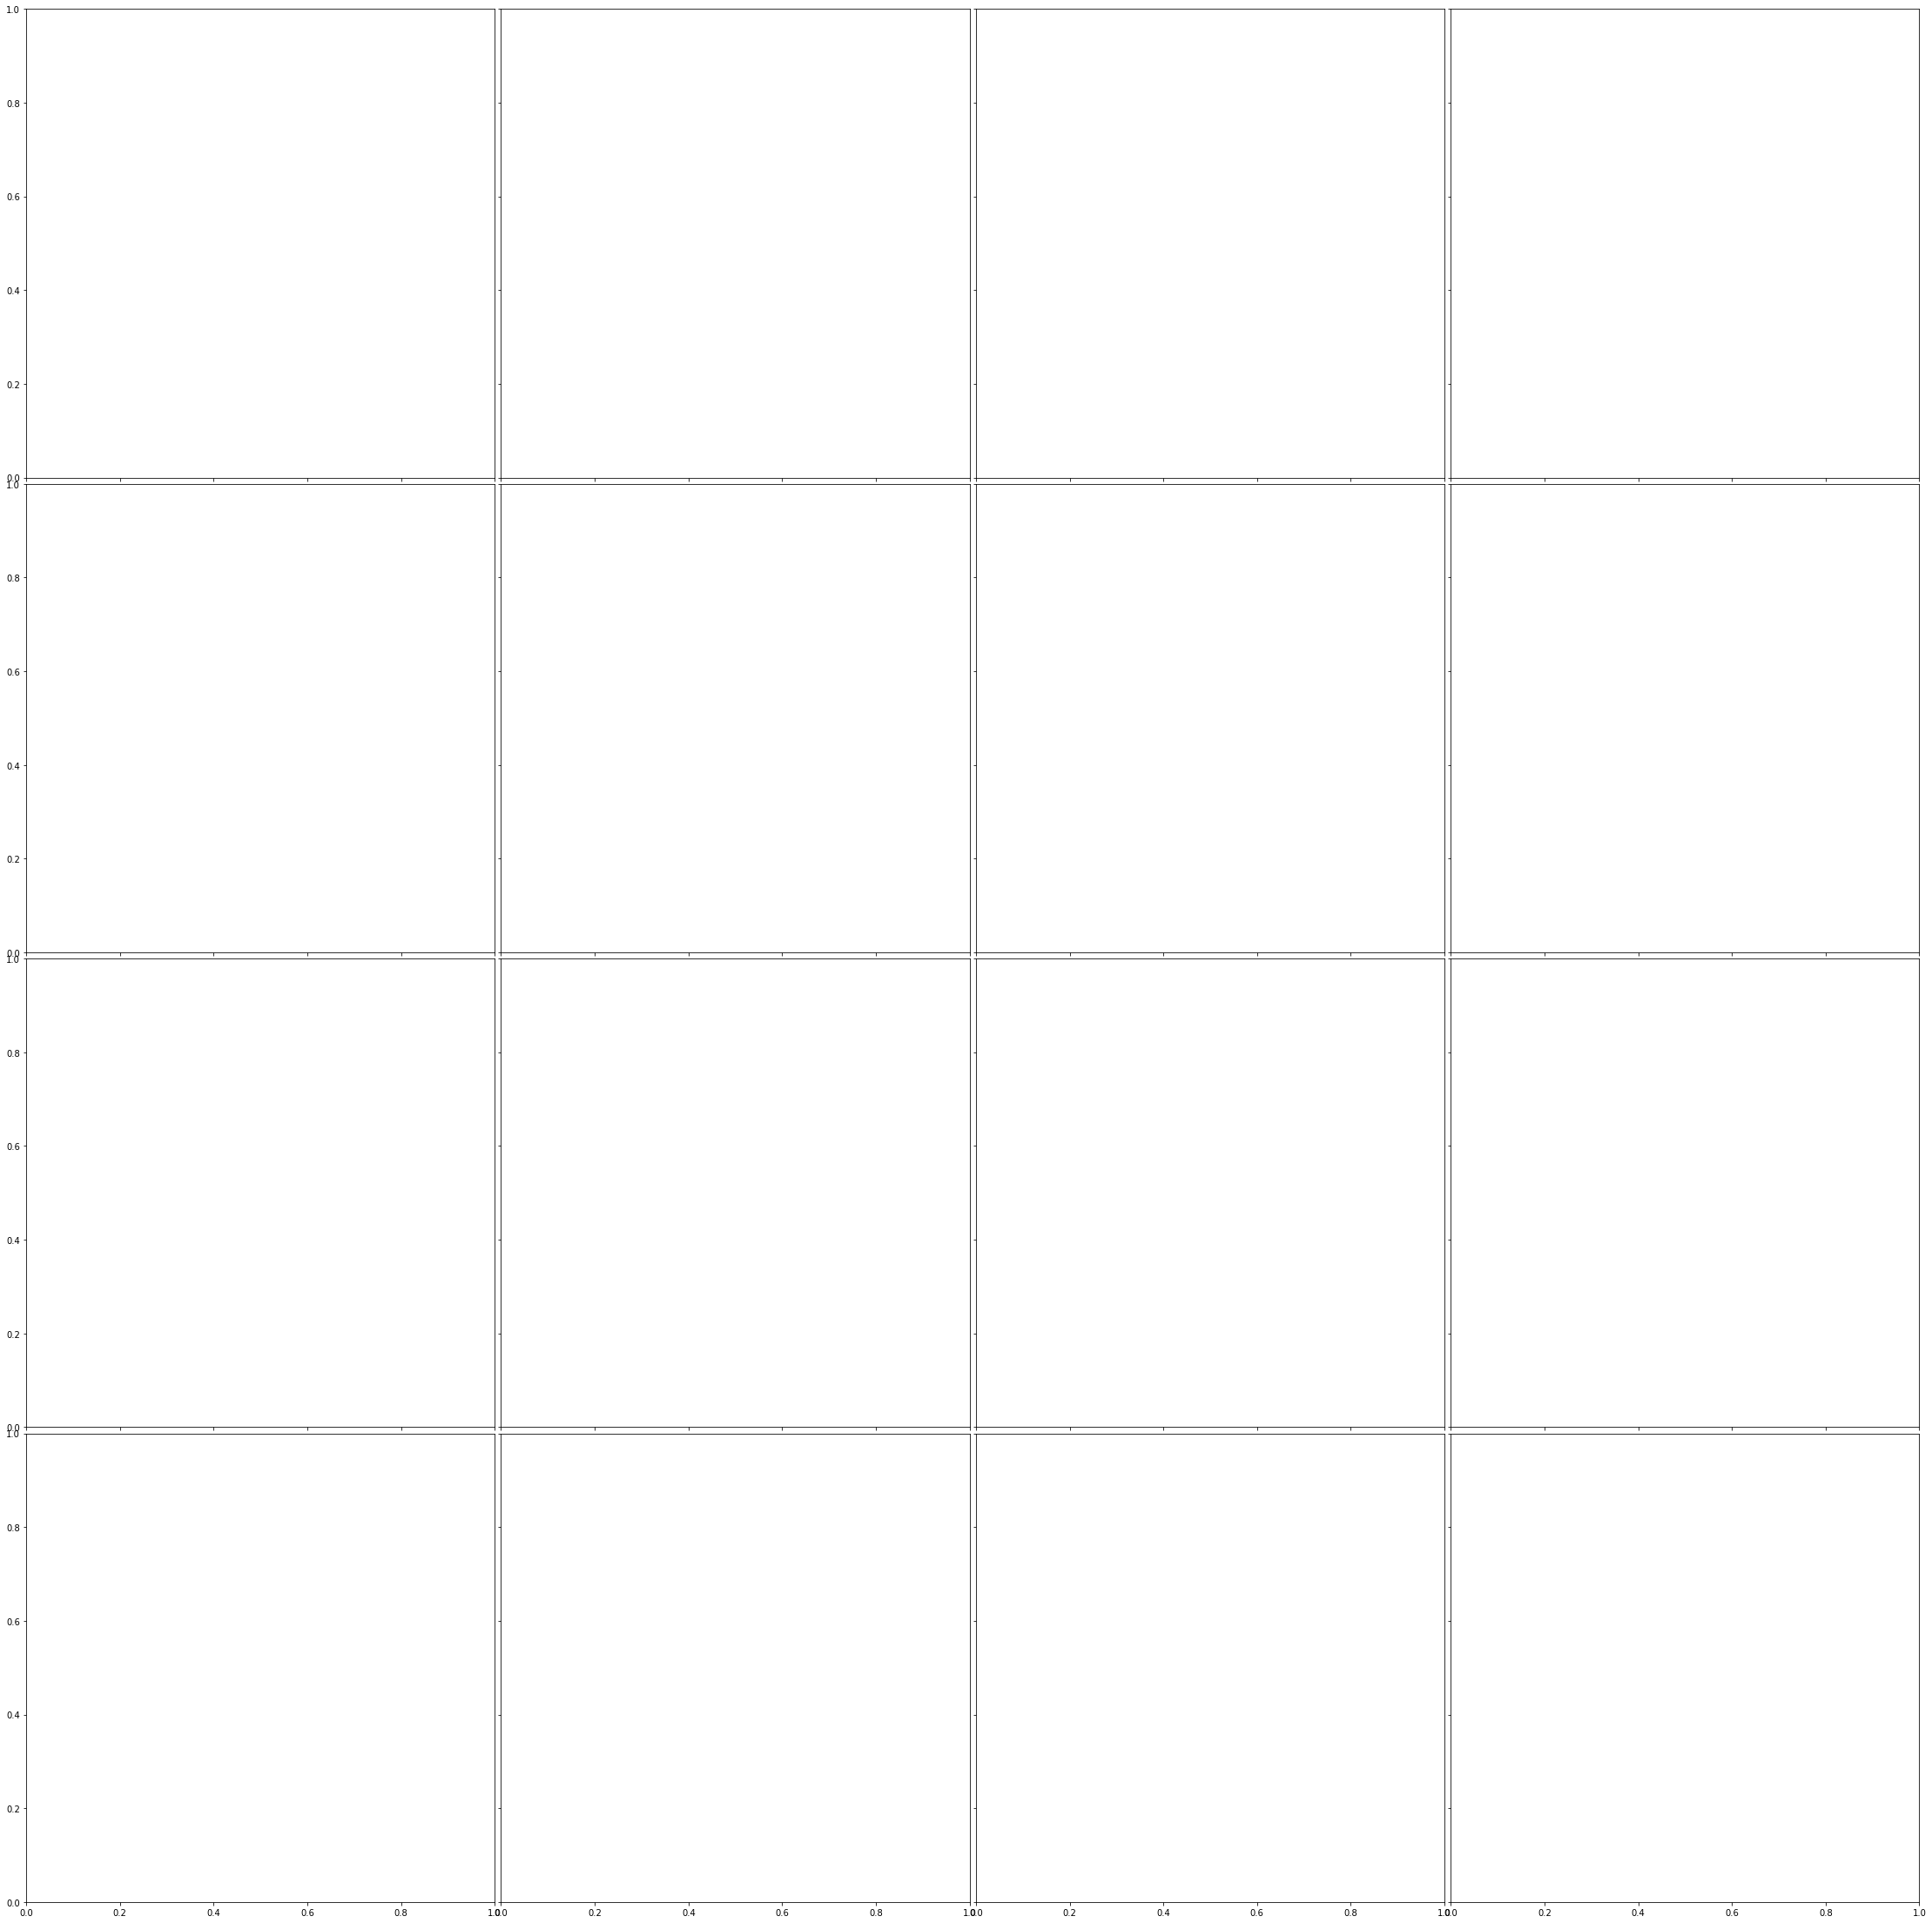

In [8]:
# Plot a grid of above 70% masked data (data + mask)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(40., 40.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, im in zip(grid, [slices[:,:,i] for i in range(16)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    # ax.imshow(im_roi, alpha=0.5)

plt.show()